In [13]:
import pandas as pd
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas
import matplotlib.pyplot as plt
import networkx as nx

# Constants
DATA_FOLDER = "data/"
FRAMINGHAM = {"name": "framingham.csv",
              "numeric_columns": ["age", "education", "cigsPerDay", "BPMeds", "totChol", "sysBP", "diaBP", "heartRate", "glucose"], # TODO - check about education
              }

framingham_df = pd.read_csv(DATA_FOLDER + FRAMINGHAM["name"])

print(framingham_df.shape)
# print(framingham_df.head())

framingham_df = framingham_df[FRAMINGHAM["numeric_columns"]]
framingham_df.dropna(inplace=True)

# Verify that there are no missing values
print("Total amount of missing values:", framingham_df.isnull().sum().sum())
print("New shape:", framingham_df.shape)

df = framingham_df

(4240, 16)
Total amount of missing values: 0
New shape: (3671, 9)


In [5]:
sm = from_pandas(framingham_df, w_threshold=0.1)

In [6]:
sm.edges

OutEdgeView([('age', 'totChol'), ('age', 'sysBP'), ('age', 'diaBP'), ('age', 'heartRate'), ('age', 'glucose'), ('education', 'age'), ('education', 'cigsPerDay'), ('education', 'totChol'), ('education', 'sysBP'), ('education', 'diaBP'), ('education', 'heartRate'), ('education', 'glucose'), ('cigsPerDay', 'age'), ('cigsPerDay', 'totChol'), ('cigsPerDay', 'diaBP'), ('cigsPerDay', 'heartRate'), ('BPMeds', 'age'), ('BPMeds', 'cigsPerDay'), ('BPMeds', 'totChol'), ('BPMeds', 'sysBP'), ('BPMeds', 'diaBP'), ('BPMeds', 'heartRate'), ('BPMeds', 'glucose'), ('sysBP', 'heartRate'), ('sysBP', 'glucose'), ('diaBP', 'totChol'), ('diaBP', 'sysBP'), ('diaBP', 'heartRate'), ('heartRate', 'totChol'), ('heartRate', 'glucose')])

In [7]:
bn = BayesianNetwork(sm)

In [10]:
bn.edges

[('age', 'totChol'),
 ('age', 'sysBP'),
 ('age', 'diaBP'),
 ('age', 'heartRate'),
 ('age', 'glucose'),
 ('sysBP', 'heartRate'),
 ('sysBP', 'glucose'),
 ('diaBP', 'totChol'),
 ('diaBP', 'sysBP'),
 ('diaBP', 'heartRate'),
 ('heartRate', 'totChol'),
 ('heartRate', 'glucose'),
 ('education', 'age'),
 ('education', 'cigsPerDay'),
 ('education', 'totChol'),
 ('education', 'sysBP'),
 ('education', 'diaBP'),
 ('education', 'heartRate'),
 ('education', 'glucose'),
 ('cigsPerDay', 'age'),
 ('cigsPerDay', 'totChol'),
 ('cigsPerDay', 'diaBP'),
 ('cigsPerDay', 'heartRate'),
 ('BPMeds', 'age'),
 ('BPMeds', 'cigsPerDay'),
 ('BPMeds', 'totChol'),
 ('BPMeds', 'sysBP'),
 ('BPMeds', 'diaBP'),
 ('BPMeds', 'heartRate'),
 ('BPMeds', 'glucose')]

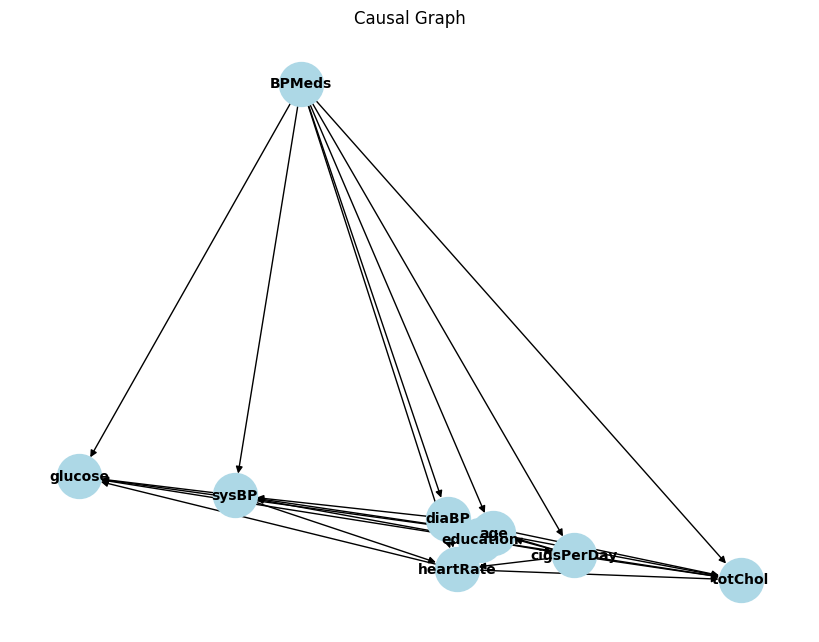

In [14]:
plt.figure(figsize=[8, 6])
pos = nx.spring_layout(sm)
nx.draw(sm, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Causal Graph")
plt.show()

In [18]:
graph = nx.DiGraph(bn.edges)
nx.is_directed_acyclic_graph(graph)

True